<Figure size 1200x1500 with 0 Axes>

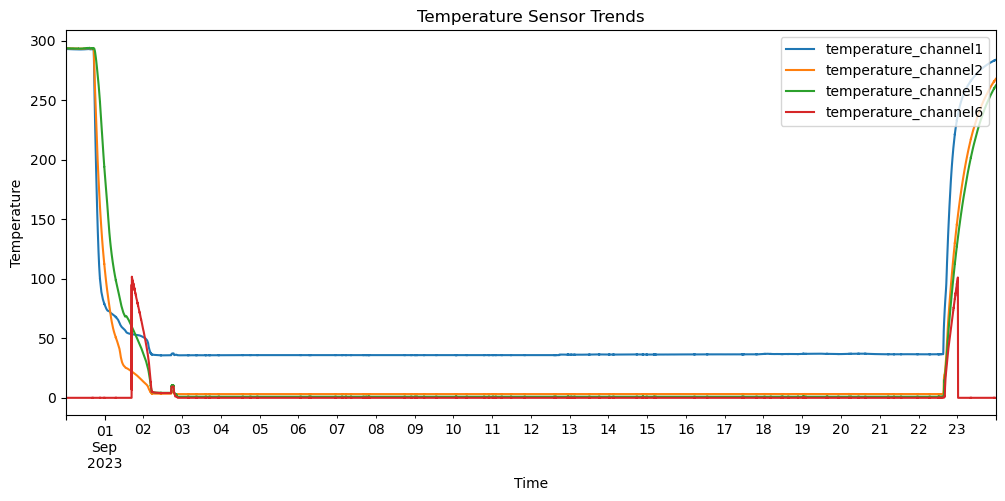

<Figure size 1200x1500 with 0 Axes>

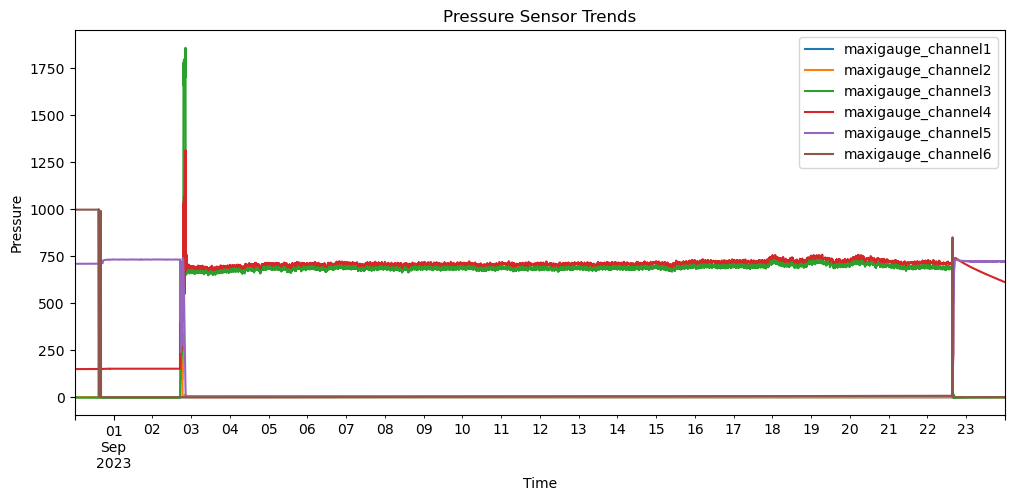

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv("../databases/processed_data/cd230831.csv", parse_dates=["datetime"])
df.set_index("datetime", inplace=True)

# 选取各类别的传感器列
cooling_cols = ["cooling_channel0", "cooling_channel1", "cooling_channel10", "cooling_channel11"]
temperature_cols = ["temperature_channel1", "temperature_channel2", "temperature_channel5", "temperature_channel6"]
maxigauge_cols = ["maxigauge_channel1", "maxigauge_channel2", "maxigauge_channel3", "maxigauge_channel4", "maxigauge_channel5", "maxigauge_channel6"]



# 画 Temperature 数据趋势
plt.figure(figsize=(12, 15))
df[temperature_cols].plot(title="Temperature Sensor Trends", figsize=(12, 5))
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend(loc="upper right")  # 右上角
plt.show()


# 画 Maxigauge (Pressure) 数据趋势
plt.figure(figsize=(12,15))
df[maxigauge_cols].plot(title="Pressure Sensor Trends", figsize=(12, 5))
plt.xlabel("Time")
plt.ylabel("Pressure")

plt.legend(loc="upper right")  # 右上角

plt.show()


<Figure size 1200x1500 with 0 Axes>

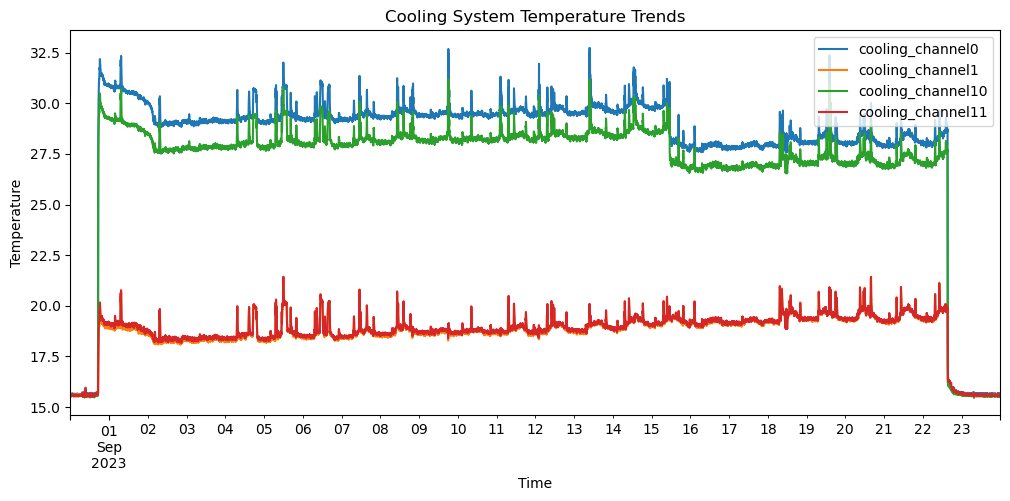

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv("../databases/processed_data/cd230831.csv", parse_dates=["datetime"])
df.set_index("datetime", inplace=True)

# 选取 Cooling 相关的列
cooling_cols = ["cooling_channel0", "cooling_channel1", "cooling_channel10", "cooling_channel11"]

# 画 Cooling 数据趋势
plt.figure(figsize=(12, 15))
df[cooling_cols].plot(title="Cooling System Temperature Trends", figsize=(12, 5))
plt.xlabel("Time")
plt.ylabel("Temperature")

# 调整图例位置
plt.legend(loc="upper right")  # 右上角
plt.show()


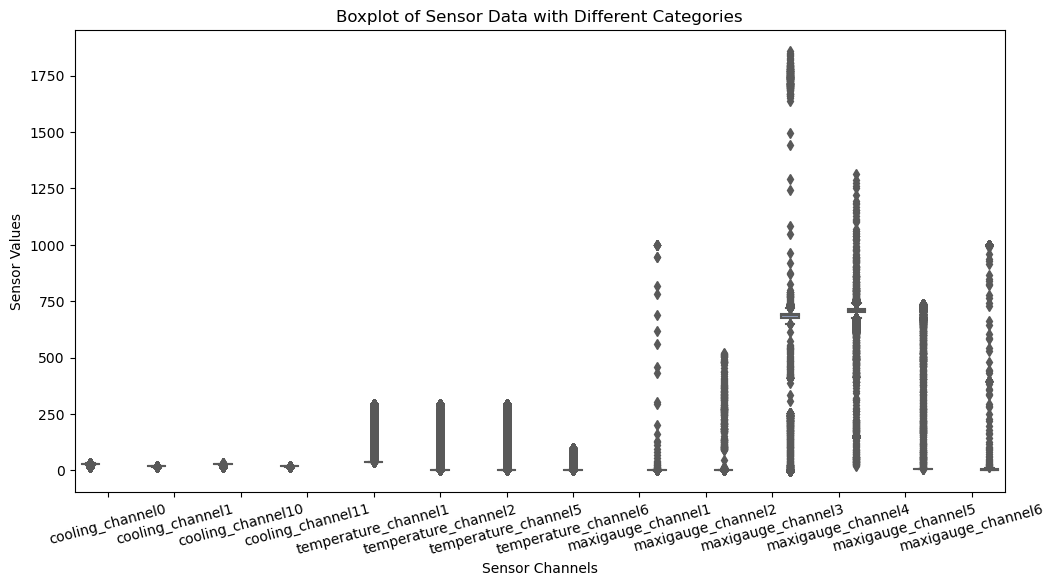

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 定义传感器分类
cooling_columns = ["cooling_channel0", "cooling_channel1", "cooling_channel10", "cooling_channel11"]
temperature_columns = ["temperature_channel1", "temperature_channel2", "temperature_channel5", "temperature_channel6"]
pressure_columns = ["maxigauge_channel1", "maxigauge_channel2", "maxigauge_channel3", 
                    "maxigauge_channel4", "maxigauge_channel5", "maxigauge_channel6"]

# 合并数据，添加分类标签
cooling_data = df[cooling_columns].melt(var_name="Sensor", value_name="Value")
cooling_data["Category"] = "Cooling"

temperature_data = df[temperature_columns].melt(var_name="Sensor", value_name="Value")
temperature_data["Category"] = "Temperature"

pressure_data = df[pressure_columns].melt(var_name="Sensor", value_name="Value")
pressure_data["Category"] = "Pressure"

# 合并数据
combined_data = pd.concat([cooling_data, temperature_data, pressure_data])

# 画箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(x="Sensor", y="Value", hue="Category", data=combined_data, palette="Set2")
plt.xticks(rotation=15)
plt.title("Boxplot of Sensor Data with Different Categories")
plt.ylabel("Sensor Values")
plt.xlabel("Sensor Channels")

# 直接隐藏图例
plt.legend().set_visible(False)

plt.show()


In [ ]:
# 将 datetime 转换为时间索引
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime")

# 计算时间范围
start_time = df.index.min()
end_time = df.index.max()
duration = end_time - start_time

print(f"📅 起始时间：{start_time}")
print(f"📅 结束时间：{end_time}")
print(f"⏳ 数据总时长：{duration}")

# 检查采样间隔是否稳定
df["time_diff"] = df.index.to_series().diff().dt.total_seconds()
print("\n采样间隔统计：")
print(df["time_diff"].describe())


📅 起始时间：2023-08-31 00:00:30
📅 结束时间：2023-09-23 23:56:00
⏳ 数据总时长：23 days 23:55:30

采样间隔统计：
count    69111.0
mean        30.0
std          0.0
min         30.0
25%         30.0
50%         30.0
75%         30.0
max         30.0
Name: time_diff, dtype: float64


In [9]:
# 将 datetime 转换为时间索引
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime")

# 计算时间范围
start_time = df.index.min()
end_time = df.index.max()
duration = end_time - start_time

print(f"📅 起始时间：{start_time}")
print(f"📅 结束时间：{end_time}")
print(f"⏳ 数据总时长：{duration}")

# 检查采样间隔是否稳定
df["time_diff"] = df.index.to_series().diff().dt.total_seconds()
print("\n采样间隔统计：")
print(df["time_diff"].describe())


📅 起始时间：2023-08-31 00:00:30
📅 结束时间：2023-09-23 23:56:00
⏳ 数据总时长：23 days 23:55:30

采样间隔统计：
count    69111.0
mean        30.0
std          0.0
min         30.0
25%         30.0
50%         30.0
75%         30.0
max         30.0
Name: time_diff, dtype: float64


In [10]:
print("列名列表：", df.columns)


列名列表： Index(['cooling_channel0', 'cooling_channel1', 'cooling_channel10',
       'cooling_channel11', 'maxigauge_channel1', 'maxigauge_channel2',
       'maxigauge_channel3', 'maxigauge_channel4', 'maxigauge_channel5',
       'maxigauge_channel6', 'temperature_channel1', 'temperature_channel2',
       'temperature_channel5', 'temperature_channel6', 'time_diff'],
      dtype='object')


时间间隔统计：
count    69111.0
mean        30.0
std          0.0
min         30.0
25%         30.0
50%         30.0
75%         30.0
max         30.0
Name: time_diff, dtype: float64


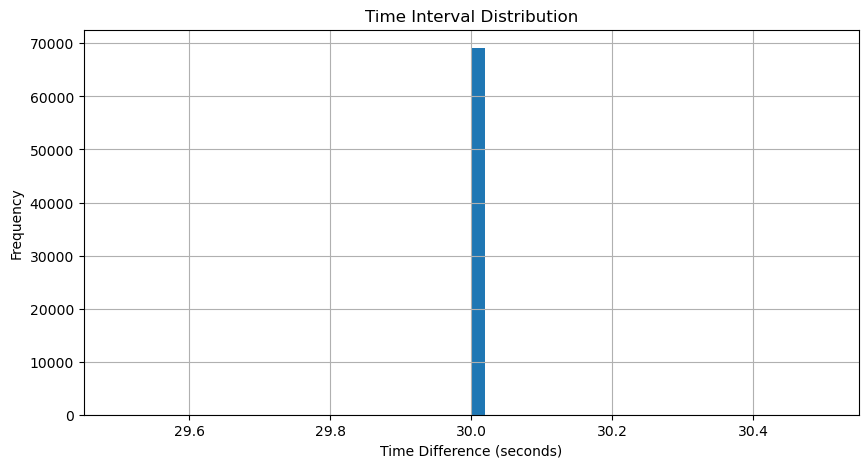

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv("../databases/processed_data/cd230831.csv")
# 设置时间索引

df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime")

# 计算时间间隔
df["time_diff"] = df.index.to_series().diff().dt.total_seconds()

# 统计时间间隔分布
print("时间间隔统计：")
print(df["time_diff"].describe())

# 绘制时间间隔分布直方图
plt.figure(figsize=(10,5))
df["time_diff"].hist(bins=50)
plt.title("Time Interval Distribution")
plt.xlabel("Time Difference (seconds)")
plt.ylabel("Frequency")
plt.show()


In [15]:
# 统计每个传感器的基本信息
sensor_columns = [
    "cooling_channel0", "cooling_channel1", "cooling_channel10", "cooling_channel11",
    "maxigauge_channel1", "maxigauge_channel2", "maxigauge_channel3",
    "maxigauge_channel4", "maxigauge_channel5", "maxigauge_channel6",
    "temperature_channel1", "temperature_channel2", "temperature_channel5", "temperature_channel6"
]

# 描述性统计信息
df[sensor_columns].describe().T


,count,mean,std,min,25%,50%,75%,max
cooling_channel0,69112.0,27.977504,3.869221,15.540780,28.056013,29.188221,29.575467,32.741482
cooling_channel1,69112.0,18.689837,1.045871,15.492667,18.516576,18.860622,19.262023,21.435473
cooling_channel10,69112.0,26.873351,3.535569,15.459187,27.048474,27.925502,28.339704,31.206866
cooling_channel11,69112.0,18.739661,1.049349,15.490223,18.579691,18.924074,19.300898,21.432148
maxigauge_channel1,69109.0,0.268709,14.705149,0.000004,0.000005,0.000006,0.000008,1000.000000
maxigauge_channel2,69109.0,0.779028,15.315679,0.000501,0.022400,0.022597,0.022800,519.902174
maxigauge_channel3,69109.0,574.415141,267.229435,-2.848525,676.913043,687.225806,695.000000,1858.688525
maxigauge_channel4,69109.0,646.645152,179.708278,20.408197,701.005405,709.764228,717.673913,1314.696721
maxigauge_channel5,69109.0,130.335198,271.207107,5.870000,5.920000,5.940000,5.967609,738.000000
maxigauge_channel6,69109.0,29.376621,158.111308,0.008442,0.707423,3.200000,5.760000,998.000000


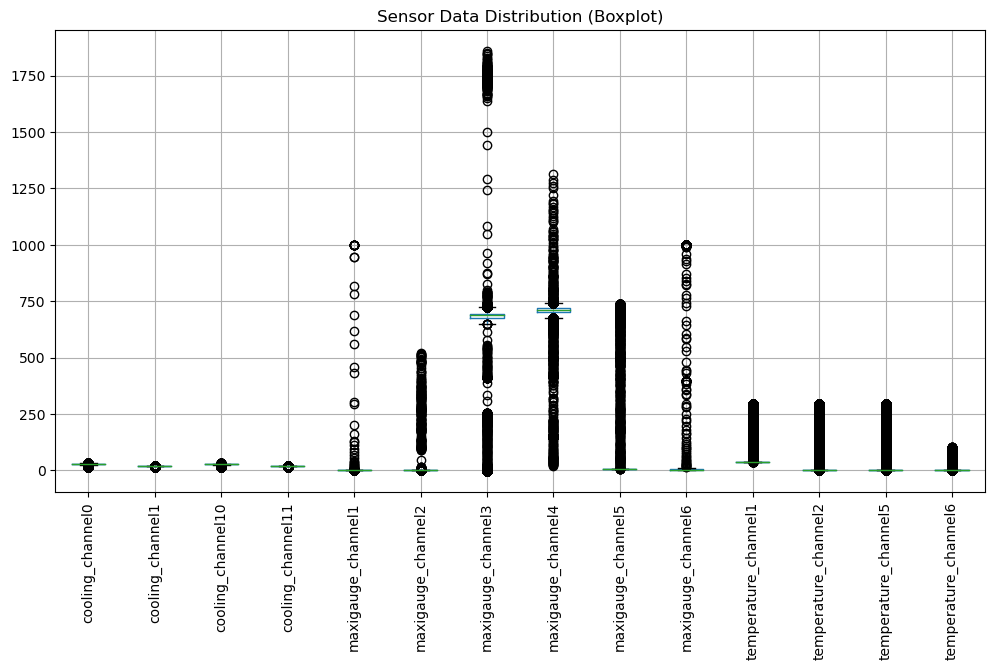

In [16]:
plt.figure(figsize=(12, 6))
df[sensor_columns].boxplot(rot=90)
plt.title("Sensor Data Distribution (Boxplot)")
plt.show()

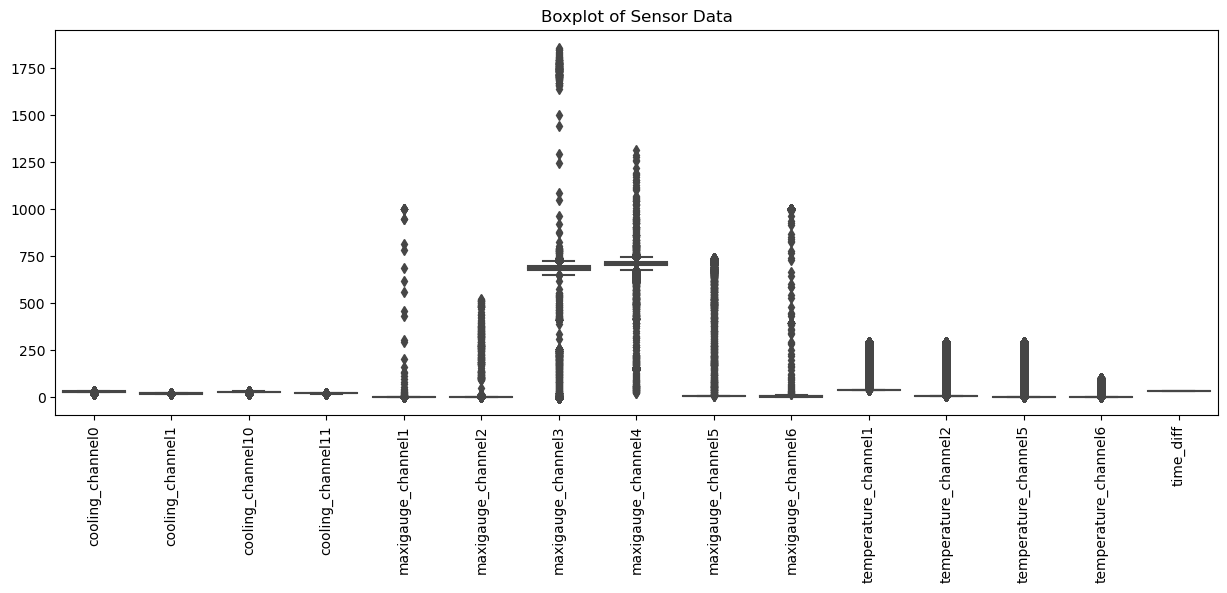

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Sensor Data")
plt.show()


<Figure size 1000x500 with 0 Axes>

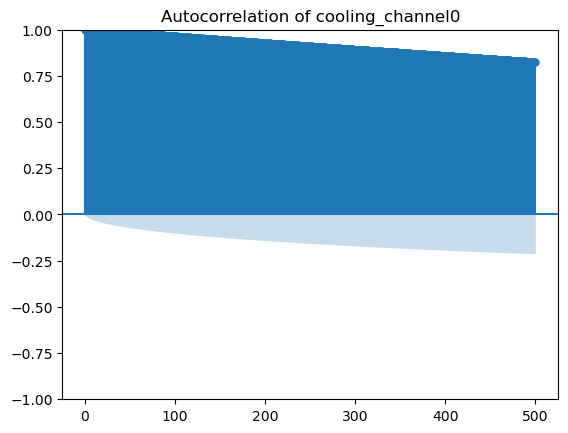

In [19]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 5))
plot_acf(df["cooling_channel0"].dropna(), lags=500)
plt.title("Autocorrelation of cooling_channel0")
plt.show()


<Axes: title={'center': 'Rolling Correlation: cooling_channel0 vs cooling_channel1'}, xlabel='datetime'>

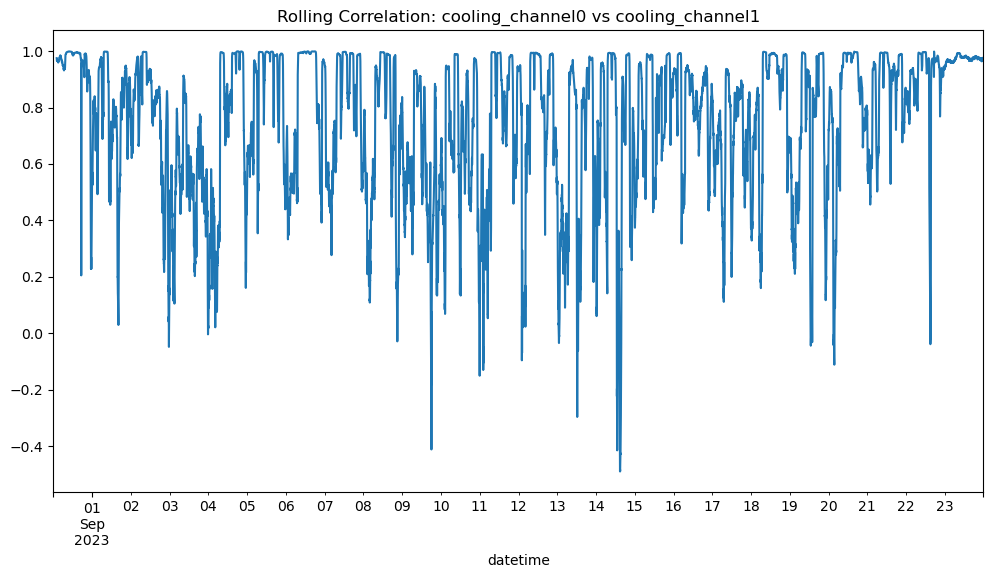

In [21]:
df["cooling_channel0"].rolling(240).corr(df["cooling_channel1"]).plot(figsize=(12, 6), title="Rolling Correlation: cooling_channel0 vs cooling_channel1")


<Axes: title={'center': 'Rolling Mean of cooling_channel0'}, xlabel='datetime'>

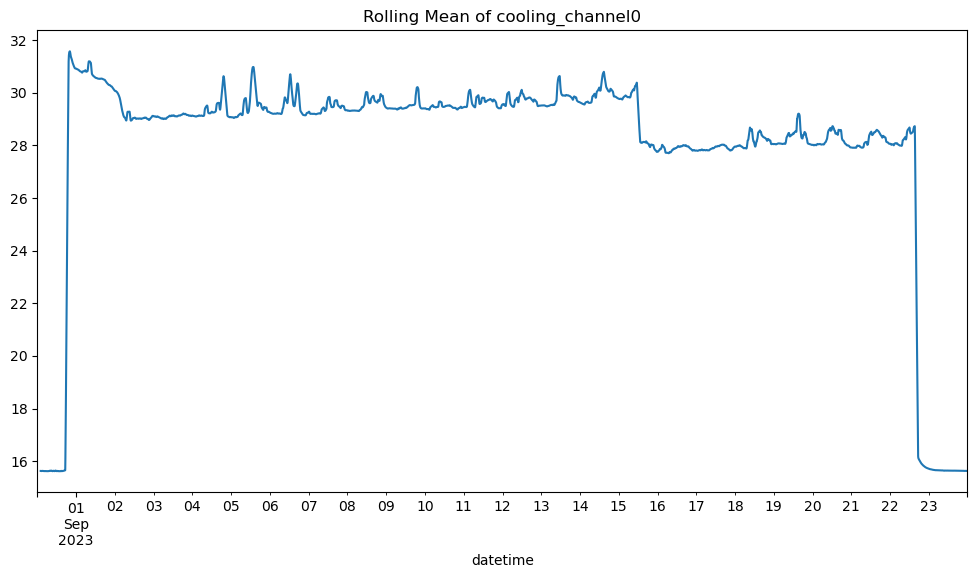

In [22]:
df["cooling_channel0"].rolling(window=240).mean().plot(figsize=(12, 6), title="Rolling Mean of cooling_channel0")


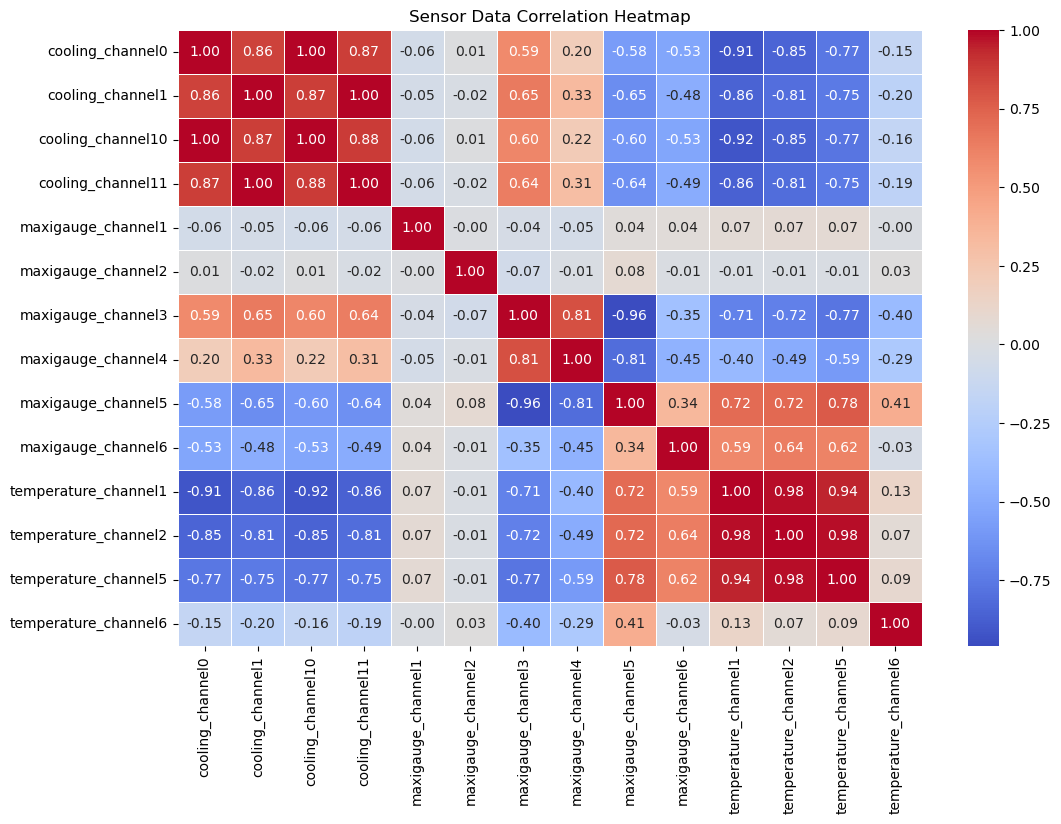

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算相关性矩阵
correlation_matrix = df[sensor_columns].corr()

# 画热力图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Sensor Data Correlation Heatmap")
plt.show()


KeyboardInterrupt: 

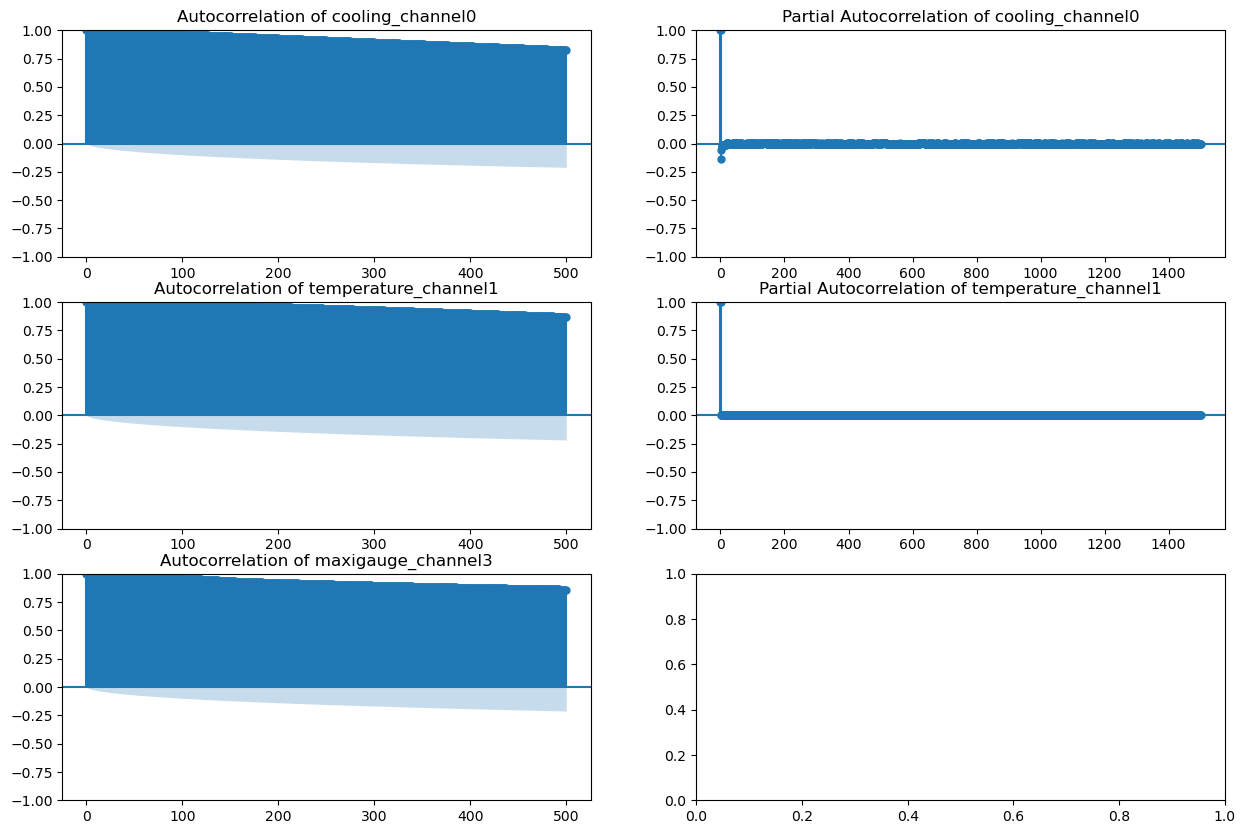

In [46]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 选择要分析的传感器数据
sensor_columns = ["cooling_channel0", "temperature_channel1", "maxigauge_channel3"]

plt.figure(figsize=(15, 10))

for i, col in enumerate(sensor_columns, 1):
    plt.subplot(len(sensor_columns), 2, 2*i-1)
    plot_acf(df[col].dropna(), lags=500, ax=plt.gca(), title=f"Autocorrelation of {col}")

    plt.subplot(len(sensor_columns), 2, 2*i)
    plot_pacf(df[col].dropna(), lags=1500, ax=plt.gca(), title=f"Partial Autocorrelation of {col}")

plt.tight_layout()
plt.show()


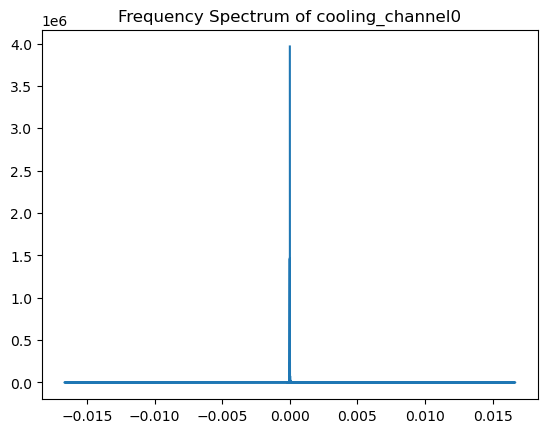

In [48]:
import numpy as np
from scipy.fftpack import fft

signal = df["temperature_channel1"].dropna().values
fft_result = fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=30)  # d=30 表示 30s 采样间隔
plt.plot(frequencies, np.abs(fft_result))
plt.title("Frequency Spectrum of cooling_channel0")
plt.show()


### 热力图

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../databases/processed_data/cd230831.csv")
df = df.dropna()

# 移除 datetime 列，因为它不是数值型
df_numeric = df.drop(columns=['datetime'], errors='ignore')

# 确保所有数据为数值型
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

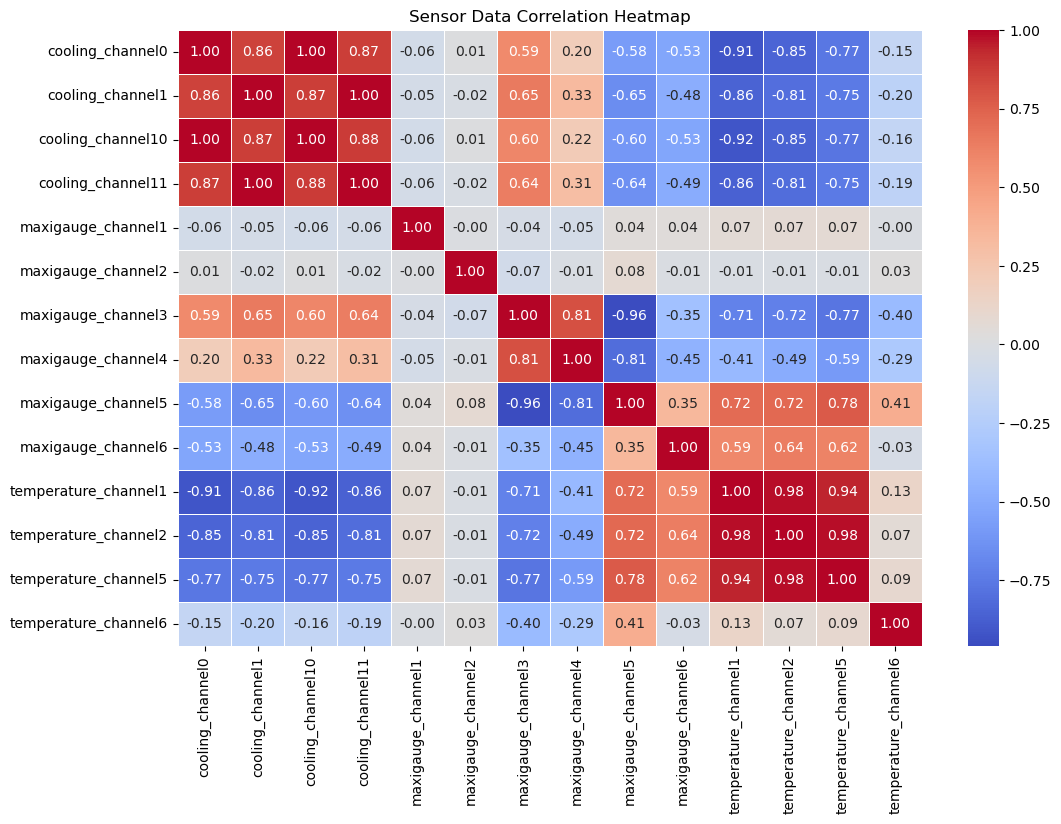

In [11]:
# 计算 Pearson 相关性矩阵
corr_matrix = df_numeric.corr()
# 设置绘图尺寸
plt.figure(figsize=(12, 8))

# 绘制热力图
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# 添加标题
plt.title("Sensor Data Correlation Heatmap")

# 显示图像
plt.show()

### 温度 vs. 时间（折线图）

<Axes: xlabel='datetime'>

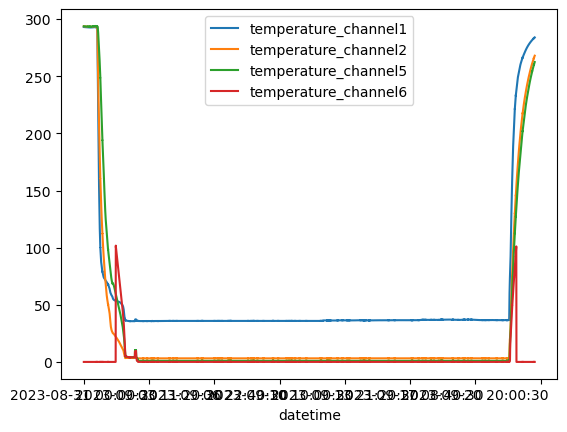

In [5]:
df.plot(x='datetime', y=['temperature_channel1', 'temperature_channel2', 'temperature_channel5', 'temperature_channel6'])

### 测试

In [1]:
import numpy as np
import pandas as pd

# 读取数据
df = pd.read_csv("../databases/processed_data/cd230831.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime").sort_index()

# 选定 cooling_channel0 和 cooling_channel1
sensor_columns = ["cooling_channel0", "cooling_channel1"]

# 降低采样频率（减少 5 倍数据量）
df = df.resample("2.5T").mean()  # 每 2.5 min 取 1 个平均值

# 定义输入和输出窗口
input_steps = 240  # 过去 2 小时
output_steps = 60  # 未来 30 分钟

# 创建训练数据
def create_sequences(data, input_steps, output_steps):
    X, y = [], []
    for i in range(len(data) - input_steps - output_steps):
        X.append(data.iloc[i:i+input_steps].values)  # 过去 240 个点
        y.append(data.iloc[i+input_steps:i+input_steps+output_steps].values)  # 未来 60 个点
    return np.array(X), np.array(y)

X, y = create_sequences(df[sensor_columns], input_steps, output_steps)

# 限制训练数据量（最多 3000 样本）
X, y = X[:3000], y[:3000]

# 训练集 & 测试集拆分
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("训练数据形状:", X_train.shape, y_train.shape)
print("测试数据形状:", X_test.shape, y_test.shape)


/Users/han/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/jy/vkj9691d74d1py1j62q_0kn80000gn/T/ipykernel_33504/425311587.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.resample("2.5T").mean()  # 每 2.5 min 取 1 个平均值


训练数据形状: (2400, 240, 2) (2400, 60, 2)
测试数据形状: (600, 240, 2) (600, 60, 2)


In [2]:
import torch
print(torch.backends.mps.is_available())  # 是否可用
print(torch.backends.mps.is_built())  # 是否已安装
print(f"当前设备: {torch.device('mps')}")


True
True
当前设备: mps


In [5]:
import torch
import torch.nn as nn
import numpy as np

# 确保使用 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Transformer 模型定义
class SensorTransformer(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, output_dim):
        super(SensorTransformer, self).__init__()
        
        # 1. 线性变换，把 input_dim 扩展到 model_dim (64)
        self.embedding = nn.Linear(input_dim, model_dim)
        
        # 2. Transformer Encoder
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        
        # 3. 输出层，映射回 output_dim (2)
        self.fc = nn.Linear(model_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)  # 线性变换
        x = self.transformer_encoder(x)  # 进入 Transformer
        x = self.fc(x)  # 线性回归预测
        return x

# 定义参数
input_dim = 2  # cooling_channel0 和 cooling_channel1
model_dim = 64  # 需要扩展到 64 维
num_heads = 4
num_layers = 3
output_dim = 2  # 仍然是 2 维（预测 cooling_channel0 和 cooling_channel1）

# 初始化模型
model = SensorTransformer(input_dim, model_dim, num_heads, num_layers, output_dim).to(device)

# 数据转换
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

# 优化器 & 损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# 训练 Transformer
epochs = 1
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # 打印训练 Loss
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# 预测
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).cpu().numpy()

print("✅ Transformer 训练完成，已预测未来 30 分钟的 cooling 传感器数据")


Using device: cpu


: 